In [1]:
from numpy import mean
import numpy as np
import pandas as pd
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers import BatchNormalization

Using TensorFlow backend.


In [2]:
train = pd.read_csv(r"D:\data viz\Datasets\MNIST\train.csv")
test = pd.read_csv(r"D:\data viz\Datasets\MNIST\test.csv")

In [3]:
label = train.label
train = train.drop('label',axis = 1)

In [4]:
train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
x_train,x_eval,y_train,y_eval = train_test_split(train,label,train_size = 0.8)

In [6]:
x_train = np.array(x_train).reshape((33600, 28, 28, 1))
x_eval = np.array(x_eval).reshape((8400, 28, 28, 1))
## one hot encode target values
y_train = to_categorical(y_train)
y_eval = to_categorical(y_eval)
#testY = to_categorical(testY)

In [7]:
# normalize to range 0-1
x_train = x_train.astype('float32')/255.0
x_eval = x_eval.astype('float32')/255.0


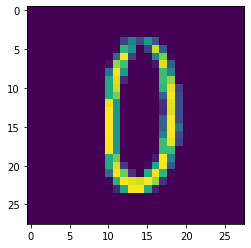

In [8]:
import matplotlib.pyplot as plt

plt.imshow(x_train[1,:,:][:,:,0])

In [9]:
#model - CNN

In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(x_train,y_train,epochs = 10, validation_split=0.1)

Train on 30240 samples, validate on 3360 samples
Epoch 1/10
30240/30240 [==============================] - 7s 240us/step - loss: 0.1677 - accuracy: 0.9487 - val_loss: 0.1043 - val_accuracy: 0.9696
Epoch 2/10
30240/30240 [==============================] - 5s 161us/step - loss: 0.0590 - accuracy: 0.9836 - val_loss: 0.0721 - val_accuracy: 0.9777
Epoch 3/10
30240/30240 [==============================] - 5s 162us/step - loss: 0.0384 - accuracy: 0.9886 - val_loss: 0.0569 - val_accuracy: 0.9848
Epoch 4/10
30240/30240 [==============================] - 5s 165us/step - loss: 0.0231 - accuracy: 0.9937 - val_loss: 0.0669 - val_accuracy: 0.9807
Epoch 5/10
30240/30240 [==============================] - 5s 165us/step - loss: 0.0163 - accuracy: 0.9960 - val_loss: 0.0771 - val_accuracy: 0.9810
Epoch 6/10
30240/30240 [==============================] - 5s 173us/step - loss: 0.0123 - accuracy: 0.9966 - val_loss: 0.0579 - val_accuracy: 0.9842
Epoch 7/10
30240/30240 [==============================] - 5s 16

In [12]:
score = model.evaluate(x_eval, y_eval, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.053099830677300425
Test accuracy: 0.9857142567634583


In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               540900    
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [14]:
#Visualizing the model

In [15]:
# summarize filters in each convolutional layer
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot

# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)

conv2d_1 (3, 3, 1, 32)


In [16]:
# retrieve weights from the second hidden layer
filters, biases = model.layers[0].get_weights()

In [17]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

Our first convolution layer is:

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

In this layer we have 32 filters on the size 3x3
Visualizing the filters:

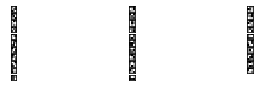

In [18]:
# plot filters from first layer
n_filters, ix = 32, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	#for j in range(3):
		# specify subplot and turn of axis
	ax = pyplot.subplot(n_filters, 3, ix)
	ax.set_xticks([])
	ax.set_yticks([])
	# plot filter channel in grayscale
    #plt.figure(10,10)
	plt.rcParams["figure.figsize"] = (50,50)
	pyplot.imshow(f[:,:,0], cmap='gray')
	ix += 1
# show the figure

pyplot.show()

In [19]:
#Seeing the values of first filter
filter_num = 1
filters[:, :, :, filter_num][:,:,0]


array([[0.453341  , 0.4571154 , 0.40194157],
       [0.57599145, 0.54081297, 0.39676112],
       [0.48198938, 0.52162874, 0.53651154]], dtype=float32)

Plotting feature map for 1s conv2d layer

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


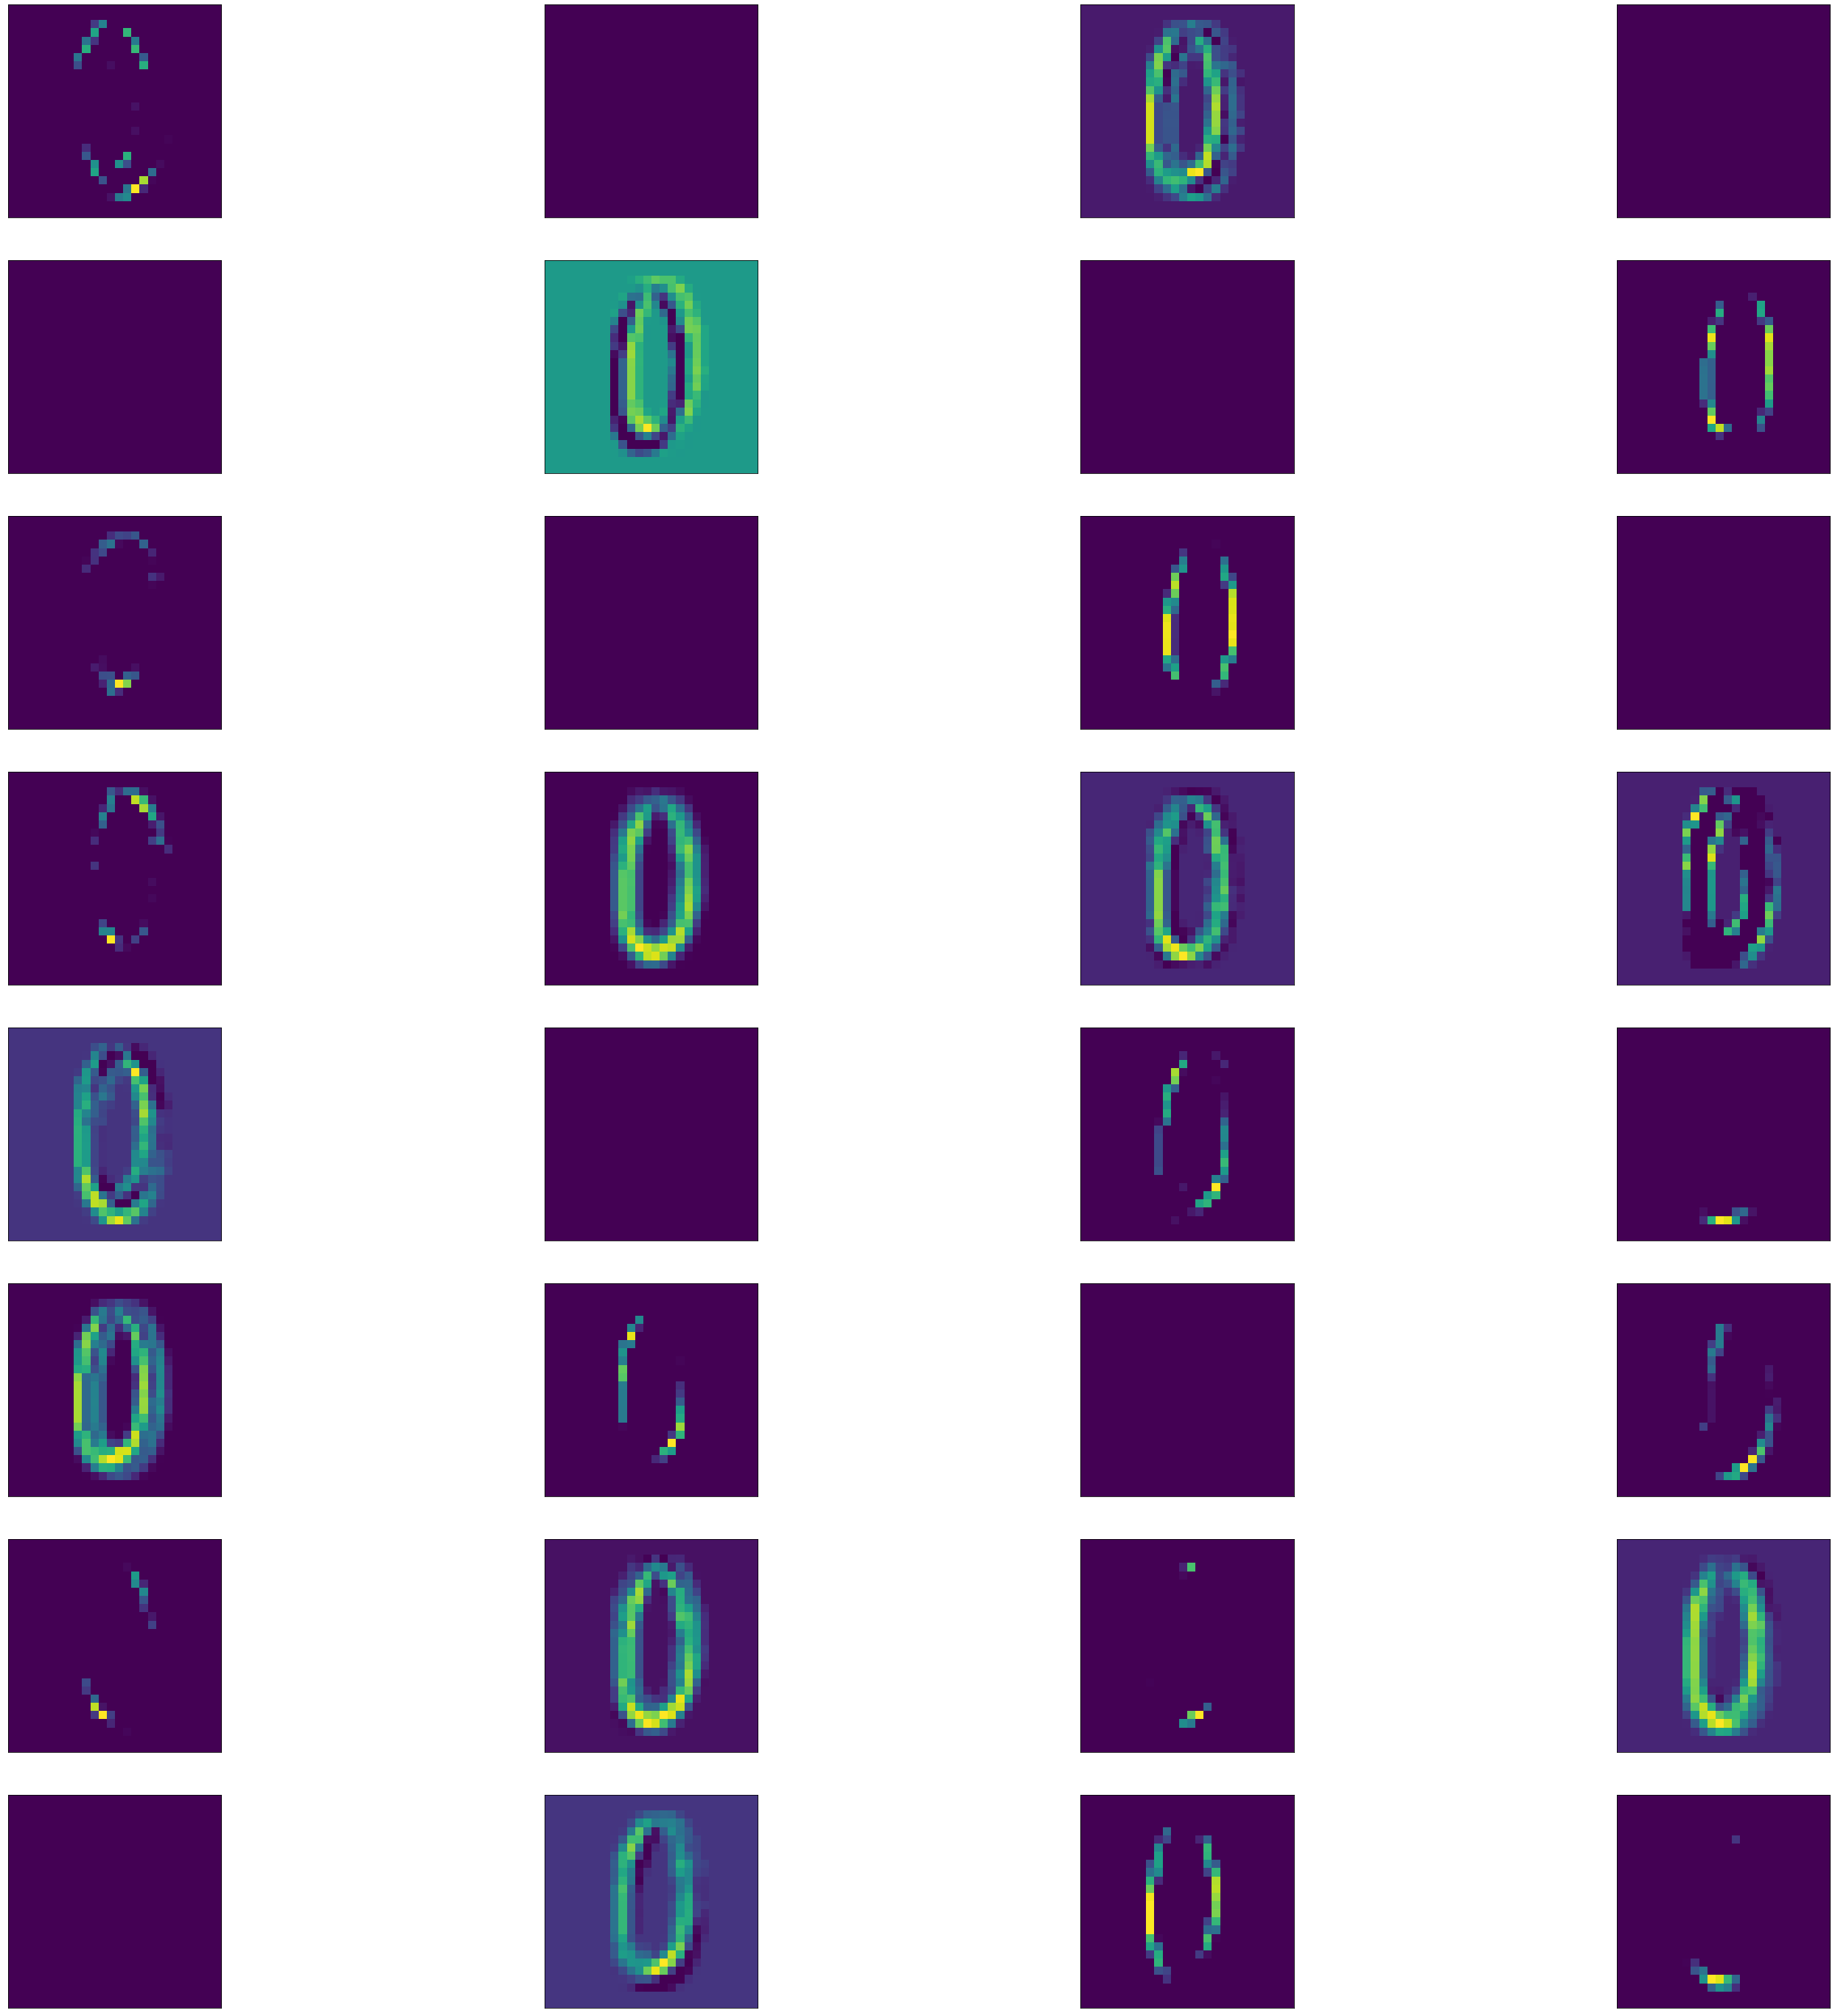

In [20]:
# plot feature map of first conv layer for given image
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

# redefine model to output right after the first hidden layer
model1 = Model(inputs=model.inputs, outputs=model.layers[0].output)
model1.summary()
# load the previosuly visualized image with the required shape

img = x_train[1,:,:]
img = expand_dims(img, axis=0)
# expand dimensions so that it represents a single 'sample'
#img = expand_dims(img, axis=0)

# get feature map for first hidden layer
feature_maps = model1.predict(img)
# plot all 32 maps in an 8x4 squares
width = 8
height = 4
ix = 1
for _ in range(width):
	for _ in range(height):
		# specify subplot and turn of axis
		ax = pyplot.subplot(width, height, ix)
		#plt.figure(figsize=(5,5))

		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		#plt.rcParams["figure.figsize"] = (,10)

		pyplot.imshow(feature_maps[0, :, :, ix-1])#, cmap='gray')
		ix += 1
# show the figure
pyplot.show()

